In [1]:
import pandas as pd
data = pd.read_csv("apples_and_oranges.csv")

In [2]:
#splitting dataset in train and testing sample

from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size=.2, random_state=1)

In [3]:
# classifying the predictors and target

x_train = training_set.iloc[:, 0:2].values
y_train = training_set.iloc[:, 2].values
x_test = test_set.iloc[:, 0:2].values
y_test = test_set.iloc[:, 2]. values

In [4]:
# initializing SVm and fitting the training data

from sklearn.svm import SVC
classifier = SVC(kernel="rbf", random_state=1)
classifier.fit(x_train, y_train)

#predicting the classes for test set
y_pred = classifier.predict(x_test)

In [6]:
# attaching the prediction test set for comparing

test_set["Predictions"] = y_pred

In [7]:
# calculating the accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.375


In [16]:
#preparation for visualization

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train,y_train)

SVC(random_state=1)

In [17]:
#visualization

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
x_set, y_set = x_train, y_train

<Figure size 700x700 with 0 Axes>

C:\Users\SRTU\AppData\Local\Temp\ipykernel_9356\2519932336.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))


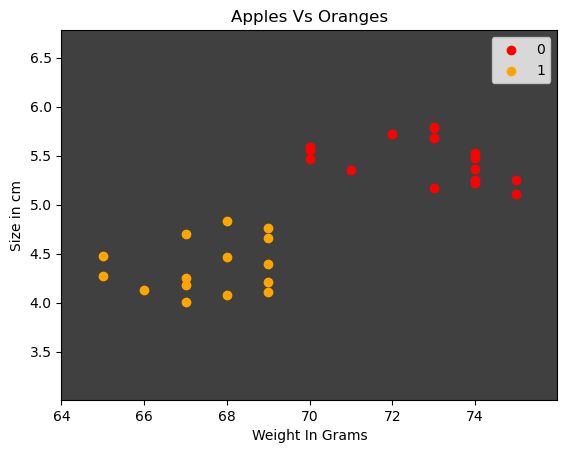

In [18]:
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1,
step = 0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step =
0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape).astype(float), alpha=0.75, cmap=ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))
(i), label = j)
plt.title('Apples Vs Oranges')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()